<center><h1> Data preperation and Model creation for Predicting Delivery Date</h1></center>

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')
#for z score
from scipy import stats

# for data visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#  for evaluating the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

missing_values = ['N/a','na',' ','',np.nan] 

df=pd.read_csv(r'C:\Users\PrashantThakre\OneDrive - Eurofins\backup\AI-ML\ExpectedDeliveryDateQuery_2022_09_05.csv')
#maindf=pd.read_csv(r'C:\Users\PrashantThakre\OneDrive - Eurofins\backup\AI-ML\ExpectedDeliveryDateQuery_2022_08_30.csv')
df

,OrderId,OrderCreationDateTime,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,Sequence,PurificationName,shipmentdate
0,11107890116-1,2022-05-10 06:31:21.323,NaN,2022-05-17 00:00:00.000,32879485,40,0.01 µmol,QPCR,[ROX]TGAATGTGGTCTCCAAAACGCTGAATGTAGTCTCCAAAAC[...,HPLC,2022-05-14 15:00:46.137
1,11107890116-1,2022-05-10 06:31:21.323,NaN,2022-05-17 00:00:00.000,32879491,18,0.01 µmol,QPCR,[YAKYE]ATCCGTTTCCATTGGTAA[BHQ1],HPLC,2022-05-14 15:00:46.203
2,11107909701-1,2022-05-02 07:10:51.757,NaN,2022-05-14 00:00:00.000,32848564,30,0.2 µmol,ALCM,[SpC3]CCCTGTCTCTTATACACATCTCCGAGGC[SpC3],HPLC,2022-05-14 11:26:58.810
3,11107910481-1,2022-05-03 06:38:31.000,NaN,2022-06-09 00:00:00.000,32853653,19,0.2 µmol,ALCU,GGAAGCTGGATACGGATGT,HPLC,NaN
4,11107911565-1,2022-05-02 07:12:04.587,NaN,2022-05-07 00:00:00.000,32848597,20,1.0 µmol,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097
...,...,...,...,...,...,...,...,...,...,...,...
482431,11108091165-1,2022-09-05 08:25:06.213,NaN,2022-09-06 17:00:00.000,33330564,20,0.01 µmol,ALCU,TGGCCACTTCAGCAAGTTCA,FAST,NaN
482432,11108091182-1,2022-09-05 08:16:13.000,NaN,2022-09-07 17:00:00.000,33330592,19,0.01 µmol,ALCU,TCTGGACCTGGTGAGTTTC,FAST,NaN
482433,11108091205-1,2022-09-05 08:29:57.093,NaN,2022-09-06 17:00:00.000,33330619,20,0.05 µmol,ALCU,TAAGTTGGAGCAGAACTAGA,FAST,NaN
482434,11108091226-1,2022-09-05 08:29:11.490,NaN,2022-09-08 17:00:00.000,33330632,39,0.01 µmol,ALCU,GAAAGCTGGGTTACTAGTTGCAACGGCACATACTTTTGG,HPSF,NaN


In [2]:
#Drop ï»¿OrderId
df=df.drop(df.iloc[:,0:1],axis=1)
#Drop columns which are not requried for EDA
df=df.drop(['OrderFirstConfirmedDateTime','OrderDueDate','ido'],axis=1)

In [3]:
df

,OrderCreationDateTime,sequencelength,ProdScale,PITname,Sequence,PurificationName,shipmentdate
0,2022-05-10 06:31:21.323,40,0.01 µmol,QPCR,[ROX]TGAATGTGGTCTCCAAAACGCTGAATGTAGTCTCCAAAAC[...,HPLC,2022-05-14 15:00:46.137
1,2022-05-10 06:31:21.323,18,0.01 µmol,QPCR,[YAKYE]ATCCGTTTCCATTGGTAA[BHQ1],HPLC,2022-05-14 15:00:46.203
2,2022-05-02 07:10:51.757,30,0.2 µmol,ALCM,[SpC3]CCCTGTCTCTTATACACATCTCCGAGGC[SpC3],HPLC,2022-05-14 11:26:58.810
3,2022-05-03 06:38:31.000,19,0.2 µmol,ALCU,GGAAGCTGGATACGGATGT,HPLC,NaN
4,2022-05-02 07:12:04.587,20,1.0 µmol,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097
...,...,...,...,...,...,...,...
482431,2022-09-05 08:25:06.213,20,0.01 µmol,ALCU,TGGCCACTTCAGCAAGTTCA,FAST,NaN
482432,2022-09-05 08:16:13.000,19,0.01 µmol,ALCU,TCTGGACCTGGTGAGTTTC,FAST,NaN
482433,2022-09-05 08:29:57.093,20,0.05 µmol,ALCU,TAAGTTGGAGCAGAACTAGA,FAST,NaN
482434,2022-09-05 08:29:11.490,39,0.01 µmol,ALCU,GAAAGCTGGGTTACTAGTTGCAACGGCACATACTTTTGG,HPSF,NaN


In [4]:
df=df.dropna()
df

,OrderCreationDateTime,sequencelength,ProdScale,PITname,Sequence,PurificationName,shipmentdate
0,2022-05-10 06:31:21.323,40,0.01 µmol,QPCR,[ROX]TGAATGTGGTCTCCAAAACGCTGAATGTAGTCTCCAAAAC[...,HPLC,2022-05-14 15:00:46.137
1,2022-05-10 06:31:21.323,18,0.01 µmol,QPCR,[YAKYE]ATCCGTTTCCATTGGTAA[BHQ1],HPLC,2022-05-14 15:00:46.203
2,2022-05-02 07:10:51.757,30,0.2 µmol,ALCM,[SpC3]CCCTGTCTCTTATACACATCTCCGAGGC[SpC3],HPLC,2022-05-14 11:26:58.810
4,2022-05-02 07:12:04.587,20,1.0 µmol,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097
5,2022-05-02 07:12:04.587,20,1.0 µmol,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097
...,...,...,...,...,...,...,...
482320,2022-09-02 14:02:06.000,22,0.01 µmol,SFONXP,GCCATTATCCATGCTGGTTCTA,FAST,2022-09-02 19:22:13.260
482321,2022-09-02 14:17:13.000,22,0.05 µmol,PCRP,CGCGCTCGAGTTACAACTTAGA,HPSF,2022-09-03 11:45:27.913
482322,2022-09-02 14:22:22.000,18,0.01 µmol,ALCU,GSGKGCGCATCTCGTCCT,HPSF,2022-09-05 06:58:24.507
482326,2022-09-02 14:38:35.000,22,0.01 µmol,ALCU,ACTGCCCTGGGTTCTGTAGTCC,FAST,2022-09-05 05:14:09.837


In [5]:
#convert to string and do left and right trim to remove whitespaces
df.ProdScale=df.ProdScale.astype(str).str.strip()
#remove units from ProdScale
df['ProdScale'] = df['ProdScale'].str.replace(r' µmol', '')  


In [6]:
df

,OrderCreationDateTime,sequencelength,ProdScale,PITname,Sequence,PurificationName,shipmentdate
0,2022-05-10 06:31:21.323,40,0.01,QPCR,[ROX]TGAATGTGGTCTCCAAAACGCTGAATGTAGTCTCCAAAAC[...,HPLC,2022-05-14 15:00:46.137
1,2022-05-10 06:31:21.323,18,0.01,QPCR,[YAKYE]ATCCGTTTCCATTGGTAA[BHQ1],HPLC,2022-05-14 15:00:46.203
2,2022-05-02 07:10:51.757,30,0.2,ALCM,[SpC3]CCCTGTCTCTTATACACATCTCCGAGGC[SpC3],HPLC,2022-05-14 11:26:58.810
4,2022-05-02 07:12:04.587,20,1.0,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097
5,2022-05-02 07:12:04.587,20,1.0,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097
...,...,...,...,...,...,...,...
482320,2022-09-02 14:02:06.000,22,0.01,SFONXP,GCCATTATCCATGCTGGTTCTA,FAST,2022-09-02 19:22:13.260
482321,2022-09-02 14:17:13.000,22,0.05,PCRP,CGCGCTCGAGTTACAACTTAGA,HPSF,2022-09-03 11:45:27.913
482322,2022-09-02 14:22:22.000,18,0.01,ALCU,GSGKGCGCATCTCGTCCT,HPSF,2022-09-05 06:58:24.507
482326,2022-09-02 14:38:35.000,22,0.01,ALCU,ACTGCCCTGGGTTCTGTAGTCC,FAST,2022-09-05 05:14:09.837


In [7]:
#get the date diff
#convert OrderCreationDateTime and shipmentdate in datetime
df['OrderCreationDateTime']=pd.to_datetime(df['OrderCreationDateTime'])
df['shipmentdate']=pd.to_datetime(df['shipmentdate'])

#calculate total shipment time
df['time_delta'] = (df.shipmentdate - df.OrderCreationDateTime)

df

,OrderCreationDateTime,sequencelength,ProdScale,PITname,Sequence,PurificationName,shipmentdate,time_delta
0,2022-05-10 06:31:21.323,40,0.01,QPCR,[ROX]TGAATGTGGTCTCCAAAACGCTGAATGTAGTCTCCAAAAC[...,HPLC,2022-05-14 15:00:46.137,4 days 08:29:24.814000
1,2022-05-10 06:31:21.323,18,0.01,QPCR,[YAKYE]ATCCGTTTCCATTGGTAA[BHQ1],HPLC,2022-05-14 15:00:46.203,4 days 08:29:24.880000
2,2022-05-02 07:10:51.757,30,0.2,ALCM,[SpC3]CCCTGTCTCTTATACACATCTCCGAGGC[SpC3],HPLC,2022-05-14 11:26:58.810,12 days 04:16:07.053000
4,2022-05-02 07:12:04.587,20,1.0,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097,21 days 21:57:52.510000
5,2022-05-02 07:12:04.587,20,1.0,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097,21 days 21:57:52.510000
...,...,...,...,...,...,...,...,...
482320,2022-09-02 14:02:06.000,22,0.01,SFONXP,GCCATTATCCATGCTGGTTCTA,FAST,2022-09-02 19:22:13.260,0 days 05:20:07.260000
482321,2022-09-02 14:17:13.000,22,0.05,PCRP,CGCGCTCGAGTTACAACTTAGA,HPSF,2022-09-03 11:45:27.913,0 days 21:28:14.913000
482322,2022-09-02 14:22:22.000,18,0.01,ALCU,GSGKGCGCATCTCGTCCT,HPSF,2022-09-05 06:58:24.507,2 days 16:36:02.507000
482326,2022-09-02 14:38:35.000,22,0.01,ALCU,ACTGCCCTGGGTTCTGTAGTCC,FAST,2022-09-05 05:14:09.837,2 days 14:35:34.837000


In [8]:
# create a colume with timedelta as total minutes, as a float type
import math
df['shipment_time_days'] = ((df.shipmentdate - df.OrderCreationDateTime) / pd.Timedelta(days=1)).apply(np.ceil)
df['shipment_time_days'] = df['shipment_time_days'].astype('int')

In [9]:
df

,OrderCreationDateTime,sequencelength,ProdScale,PITname,Sequence,PurificationName,shipmentdate,time_delta,shipment_time_days
0,2022-05-10 06:31:21.323,40,0.01,QPCR,[ROX]TGAATGTGGTCTCCAAAACGCTGAATGTAGTCTCCAAAAC[...,HPLC,2022-05-14 15:00:46.137,4 days 08:29:24.814000,5
1,2022-05-10 06:31:21.323,18,0.01,QPCR,[YAKYE]ATCCGTTTCCATTGGTAA[BHQ1],HPLC,2022-05-14 15:00:46.203,4 days 08:29:24.880000,5
2,2022-05-02 07:10:51.757,30,0.2,ALCM,[SpC3]CCCTGTCTCTTATACACATCTCCGAGGC[SpC3],HPLC,2022-05-14 11:26:58.810,12 days 04:16:07.053000,13
4,2022-05-02 07:12:04.587,20,1.0,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097,21 days 21:57:52.510000,22
5,2022-05-02 07:12:04.587,20,1.0,ALCU,TTTTTTTTTTGGGGGGGGGG,FAST,2022-05-24 05:09:57.097,21 days 21:57:52.510000,22
...,...,...,...,...,...,...,...,...,...
482320,2022-09-02 14:02:06.000,22,0.01,SFONXP,GCCATTATCCATGCTGGTTCTA,FAST,2022-09-02 19:22:13.260,0 days 05:20:07.260000,1
482321,2022-09-02 14:17:13.000,22,0.05,PCRP,CGCGCTCGAGTTACAACTTAGA,HPSF,2022-09-03 11:45:27.913,0 days 21:28:14.913000,1
482322,2022-09-02 14:22:22.000,18,0.01,ALCU,GSGKGCGCATCTCGTCCT,HPSF,2022-09-05 06:58:24.507,2 days 16:36:02.507000,3
482326,2022-09-02 14:38:35.000,22,0.01,ALCU,ACTGCCCTGGGTTCTGTAGTCC,FAST,2022-09-05 05:14:09.837,2 days 14:35:34.837000,3


In [10]:
df=df.drop(['OrderCreationDateTime','time_delta','shipmentdate','Sequence'],axis=1)

In [ ]:
colors = ['pink', 'silver', 'steelblue','blue']
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
df_cases.groupby(['department']).sum().plot(
    kind='pie', y='death_inhosp', autopct='%1.0f%%',
  colors=colors, explode=explode)

In [11]:
def pintLenColVal():
    a=df.columns
    for a in df.columns:
        print( f" {a} : ",len(pd.unique(df[a])))

pintLenColVal()

 sequencelength :  122
 ProdScale :  8
 PITname :  25
 PurificationName :  5
 shipment_time_days :  55


<AxesSubplot:xlabel='shipment_time_days'>

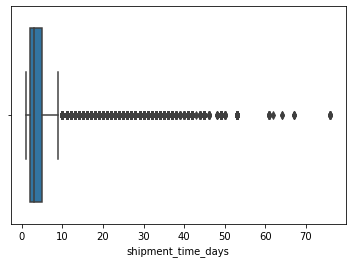

In [12]:
sns.boxplot('shipment_time_days',data=df)

<AxesSubplot:xlabel='shipment_time_days'>

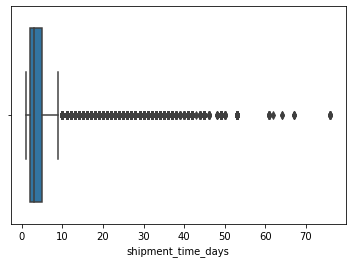

In [13]:
sns.boxplot(x=df['shipment_time_days'])

In [14]:
df.sort_values(['shipment_time_days'], ascending=False)

,sequencelength,ProdScale,PITname,PurificationName,shipment_time_days
425109,5,0.01,ALCM,HPLC,76
214608,5,0.01,ALCM,HPLC,76
63203,5,0.01,ALCM,HPLC,76
96273,5,0.01,ALCM,HPLC,76
305010,5,0.01,ALCM,HPLC,76
...,...,...,...,...,...
204711,35,0.01,ALCU,FAST,1
44320,29,0.01,ALCU,FAST,1
204710,35,0.01,ALCU,FAST,1
204709,35,0.01,ALCU,FAST,1


In [15]:
#drop the rows where shipment_time_hrs value is greater than 7 days (168 hours)
df.drop(df[df['shipment_time_days'] > 7].index,inplace = True)

<AxesSubplot:xlabel='shipment_time_days'>

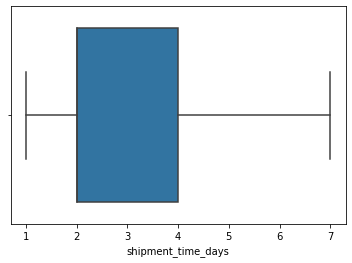

In [16]:
sns.boxplot(x=df['shipment_time_days'])

In [17]:
#instead doing one hot encoding lets try with single column apporach by renaming catagorial to numeric
PITs=df.PITname.unique()
keys = range(len(PITs))
pit_dict=dict(zip(PITs,keys))

purifications=df.PurificationName.unique()
keys = range(len(purifications))
purification_dict=dict(zip(purifications,keys))

In [18]:
print(pit_dict)
print(purification_dict)

{'QPCR': 0, 'ALCU': 1, 'ALCM': 2, 'SEQP': 3, 'PCRP': 4, 'CLON': 5, 'SFONXP': 6, 'SEQPNXP': 7, 'PCRPNXP': 8, 'NGS_OLIGO': 9, 'SEQPPNXP': 10, 'LNAPrimer': 11, 'PLATE': 12, 'RNAC': 13, 'QStock': 14, 'EXTREMERS': 15, 'LNAProbe': 16, '4Splate': 17, 'LCProbe': 18}
{'HPLC': 0, 'FAST': 1, 'HPSF': 2}


In [19]:
#replace categorial values to desired number
df.PurificationName.replace(purification_dict,inplace=True)
df.PITname.replace(pit_dict,inplace=True)

In [20]:
df.sort_values(['ProdScale'],ascending=False)

,sequencelength,ProdScale,PITname,PurificationName,shipment_time_days
423269,20,10.0,1,2,6
117809,5,10.0,1,2,6
145800,13,10.0,1,2,4
398539,34,10.0,1,2,7
92647,20,10.0,1,2,6
...,...,...,...,...,...
148633,45,0.004,17,1,4
148634,45,0.004,17,1,4
148635,45,0.004,17,1,4
148636,45,0.004,17,1,4


In [21]:
len(df['ProdScale'].unique())
for a in df['ProdScale'].unique():
    print(a)

0.01
0.05
0.2
1.0
10.0
0.004


In [22]:
df['ProdScale']=df['ProdScale'].astype(float)

In [23]:
#sns having issues to handle float hence converting to int
df['ProdScale']=df['ProdScale'].apply(lambda x:x*1000)

In [24]:
df['ProdScale']=df['ProdScale'].astype('int')
df.sort_values(['ProdScale'],ascending=False)

,sequencelength,ProdScale,PITname,PurificationName,shipment_time_days
423269,20,10000,1,2,6
117809,5,10000,1,2,6
145800,13,10000,1,2,4
398539,34,10000,1,2,7
92647,20,10000,1,2,6
...,...,...,...,...,...
148633,45,4,17,1,4
148634,45,4,17,1,4
148635,45,4,17,1,4
148636,45,4,17,1,4


<AxesSubplot:xlabel='ProdScale'>

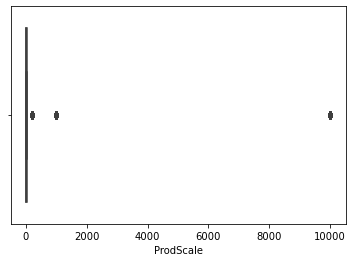

In [25]:
sns.boxplot(x=df['ProdScale'])

In [31]:
import numpy as np
from scipy import stats
df['min_zscore']=np.abs(stats.zscore(df['ProdScale'])) < 3
#len(pd.unique(df['min_zscore']))
df['ProdScale'][df['min_zscore']==False]
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

198       1000
199       1000
277       1000
1155      1000
1627      1000
          ... 
479967    1000
479968    1000
480687    1000
480784    1000
481450    1000
Name: ProdScale, Length: 2174, dtype: int32

In [32]:
df['ProdScale'][df['min_zscore']==False].unique()

array([ 1000, 10000])

In [33]:
df['ProdScale'][df['min_zscore']==False].count()

2174

In [34]:
df.drop(df['ProdScale'][df['min_zscore']==False].index, inplace = True)

<AxesSubplot:xlabel='ProdScale'>

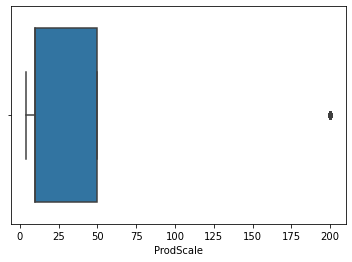

In [35]:
sns.boxplot('ProdScale',data=df)

In [36]:
df['min_zscore']=np.abs(stats.zscore(df['ProdScale'])) < 3
#len(pd.unique(df['min_zscore']))
df['ProdScale'][df['min_zscore']==False]
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

197       200
235       200
598       200
599       200
604       200
         ... 
480846    200
480954    200
481067    200
481470    200
481617    200
Name: ProdScale, Length: 7257, dtype: int32

In [37]:
df['ProdScale'][df['min_zscore']==False].unique()

array([200])

In [38]:
df['ProdScale'][df['min_zscore']==False].count()

7257

In [39]:
df.drop(df['ProdScale'][df['min_zscore']==False].index, inplace = True)

<AxesSubplot:xlabel='ProdScale'>

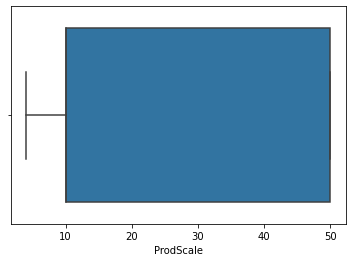

In [40]:
sns.boxplot(x=df.ProdScale)

In [26]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

10 ==> 195477
50 ==> 72723
200 ==> 7257
1000 ==> 2119
10000 ==> 55
4 ==> 553


In [41]:
df

,sequencelength,ProdScale,PITname,PurificationName,shipment_time_days,min_zscore
0,40,10,0,0,5,True
1,18,10,0,0,5,True
9,20,10,1,1,5,True
10,20,10,1,1,5,True
11,20,10,1,1,5,True
...,...,...,...,...,...,...
482320,22,10,6,1,1,True
482321,22,50,4,2,1,True
482322,18,10,1,2,3,True
482326,22,10,1,1,3,True


In [42]:
df.drop(['min_zscore'],axis=1,inplace=True)

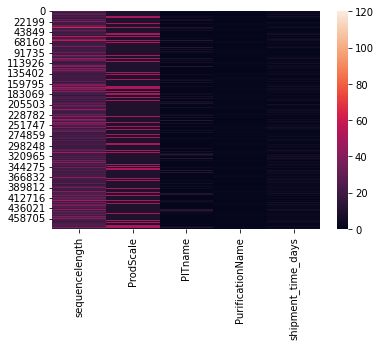

In [43]:
# plotting the heatmap
hm = sns.heatmap(data = df)  
# displaying the plotted heatmap
plt.show()

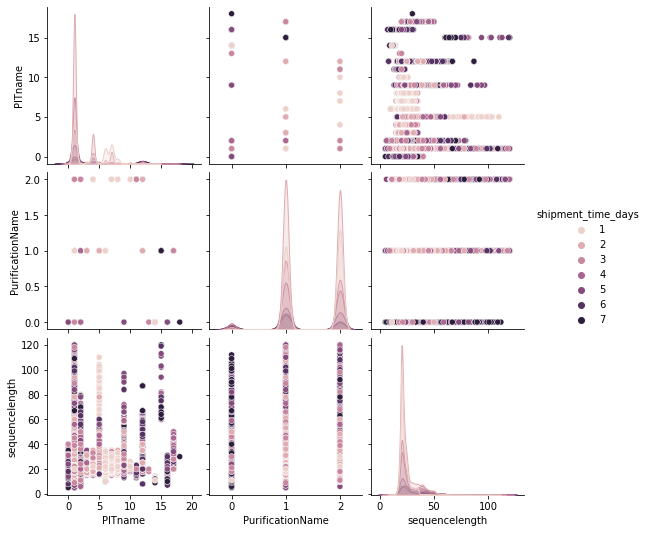

In [44]:
# piarplor to create pairwise relationships in a dataset.
sns.pairplot(df,vars = ['PITname','PurificationName','sequencelength'], hue="shipment_time_days")


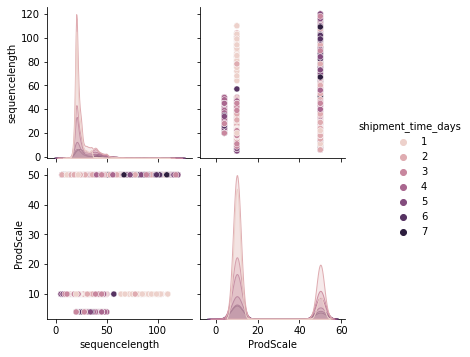

In [45]:
# piarplor to create pairwise relationships in a dataset.
sns.pairplot(df,vars = ['sequencelength','ProdScale'], hue="shipment_time_days")

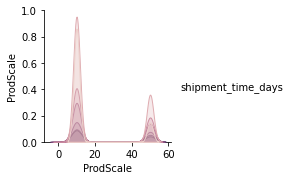

In [47]:
sns.pairplot(df,vars = ['ProdScale'], hue="shipment_time_days")

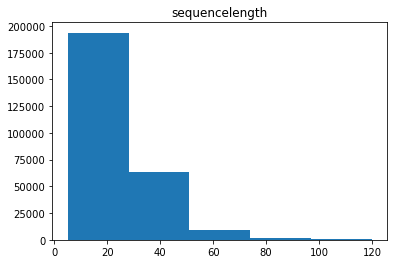

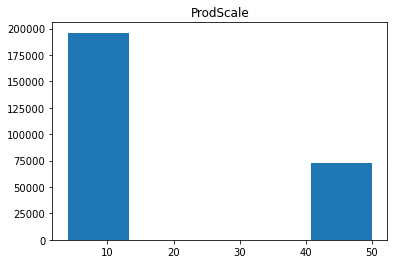

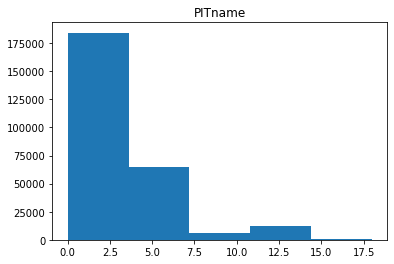

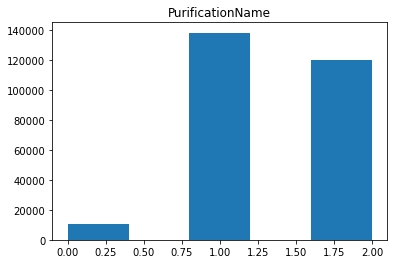

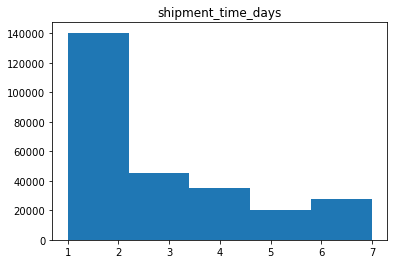

In [50]:
#binning
for a in df.columns:
    plt.hist(df[a], bins=5)
    plt.title(a)
    plt.show()

In [51]:
df.reset_index()

,index,sequencelength,ProdScale,PITname,PurificationName,shipment_time_days
0,0,40,10,0,0,5
1,1,18,10,0,0,5
2,9,20,10,1,1,5
3,10,20,10,1,1,5
4,11,20,10,1,1,5
...,...,...,...,...,...,...
268748,482320,22,10,6,1,1
268749,482321,22,50,4,2,1
268750,482322,18,10,1,2,3
268751,482326,22,10,1,1,3


In [52]:
df.to_csv('preprocessed.csv',index=False)

<center><h1> Model Creation </h1></center>

In [54]:
# Drop the colum class_account from DF for train set 
x = df.drop(['shipment_time_days'],axis=1)
y = df['shipment_time_days'] 

In [99]:
#spiltting data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### RandomForestClassifier

In [56]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200,max_depth= 30,)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [58]:
y_pred

array([2, 1, 2, ..., 2, 5, 1])

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41866972272246944


### Gaussian Naive Bayes

In [100]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnbm=gnb.fit(x_train, y_train)

In [101]:
y_pred = gnb.predict(x_test)

y_pred

array([2, 1, 2, ..., 2, 2, 1])

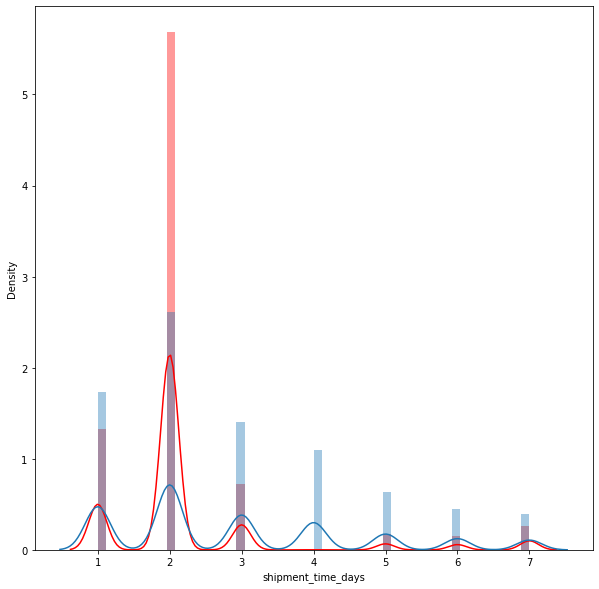

In [102]:
predict = pd.DataFrame(y_pred)

plt.figure(figsize=(10,10))        
sns.distplot(predict,color='red')
sns.distplot(pd.DataFrame(y_test).shipment_time_days)
plt.show()


In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 7406  9187    95     9    34    63    10]
 [ 2572 20678  1391     8   305   205   146]
 [  641 10436  1710     5   313   218   245]
 [  877  7524  1244     7   315   169   481]
 [  318  3952  1104     6   279   251   248]
 [  501  1766   859     1   295   335   611]
 [  512  1442   646     2   151   241   812]]


In [104]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  7406

True Negatives(TN) =  20678

False Positives(FP) =  9187

False Negatives(FN) =  2572


In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.44      0.50     16804
           2       0.38      0.82      0.52     25305
           3       0.24      0.13      0.17     13568
           4       0.18      0.00      0.00     10617
           5       0.16      0.05      0.07      6158
           6       0.23      0.08      0.11      4368
           7       0.32      0.21      0.26      3806

    accuracy                           0.39     80626
   macro avg       0.30      0.25      0.23     80626
weighted avg       0.34      0.39      0.32     80626



In [106]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [107]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7049


In [77]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2937


In [78]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.4497


In [79]:
# instantiate the DecisionTreeClassifier model with criterion entropy
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [80]:
y_pred_en = clf_en.predict(x_test)

In [82]:
clf_en.predict(pd.DataFrame([[10,50,6,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

1

In [83]:
clf_en.predict(pd.DataFrame([[10,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [96]:
gnb.predict(pd.DataFrame([[10,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [86]:
clf_en.predict(pd.DataFrame([[56,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [91]:
clf_en.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [98]:
gnb.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [92]:
gnb.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [87]:
clf_en.predict(pd.DataFrame([[56,50,5,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [109]:
clf.predict(pd.DataFrame([[56,50,5,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [110]:
clf.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

2

In [112]:
clf_en.predict(pd.DataFrame([[40,10,0,0]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

3

In [113]:
gnb.predict(pd.DataFrame([[40,10,0,0]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

3